# Homework

---

### Q1

Complete the code below showing the sequential posterior distributions created as each observation is observed.

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Binomial}\\\\
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for }p=\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

### Q2

Return to the last few questions of the lecture and consider the question $\theta_1^{true} < \theta_2^{true}$.

1. Let the $(t)$ superscript indicate time and consider the posteriors

   $$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$
   
2. Set $n_j^{(0)}=x_j^{(0)}=0$ and iterate time using `for t in range(m):`

3. At each step flip a coin with success probability $\theta_1^{true}$ or $\theta_2^{true}$ where the chance of flipping based on $\theta_2^{true}$ is $\Pr(\theta_1 < \theta_2 | n_1^{(t)},x_1^{(t)},n_2^{(t)},x_2^{(t)})$

4. Update the $n_j^{(t+1)}$ and $x_j^{(t+1)}$ as appropriate

5. If your algorithm is working then this will automatically learn which of $\theta_1^{true}$ and $\theta_2^{true}$ is larger

This procedure is known as the **Bayesian multi-armed bandit** and is considered a very useful tool for effectively balancing the **exploration-exploitation** tradeoff in the so-called **AB testing** context. You can always search for more information about something to help understanding better.

*Provide some visualizations demonstrating the learning process that the algorithm undergoes.*

### Q3

Generalize this process to a situation where there are three (not two) entitites with binary outcomes, each with differing chances of success of those binary outcomes. Compare two analyses simultaneously based on the same data:
1. Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above
2. Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

*Discuss which of the two approaches you think is most appropriate and describe an actual real world **AB testing** context where you could deploy this **Bayesian multi-armed bandit** to effectively balancing the **exploration-exploitation** tradeoff in that setting.*

# **Question 1**
The task involves updating sequential posterior distributions using a Beta-Binomial model as new observations are made. This process relies on Bayesian principles, where a prior distribution is combined with the likelihood of observed data to compute the posterior.

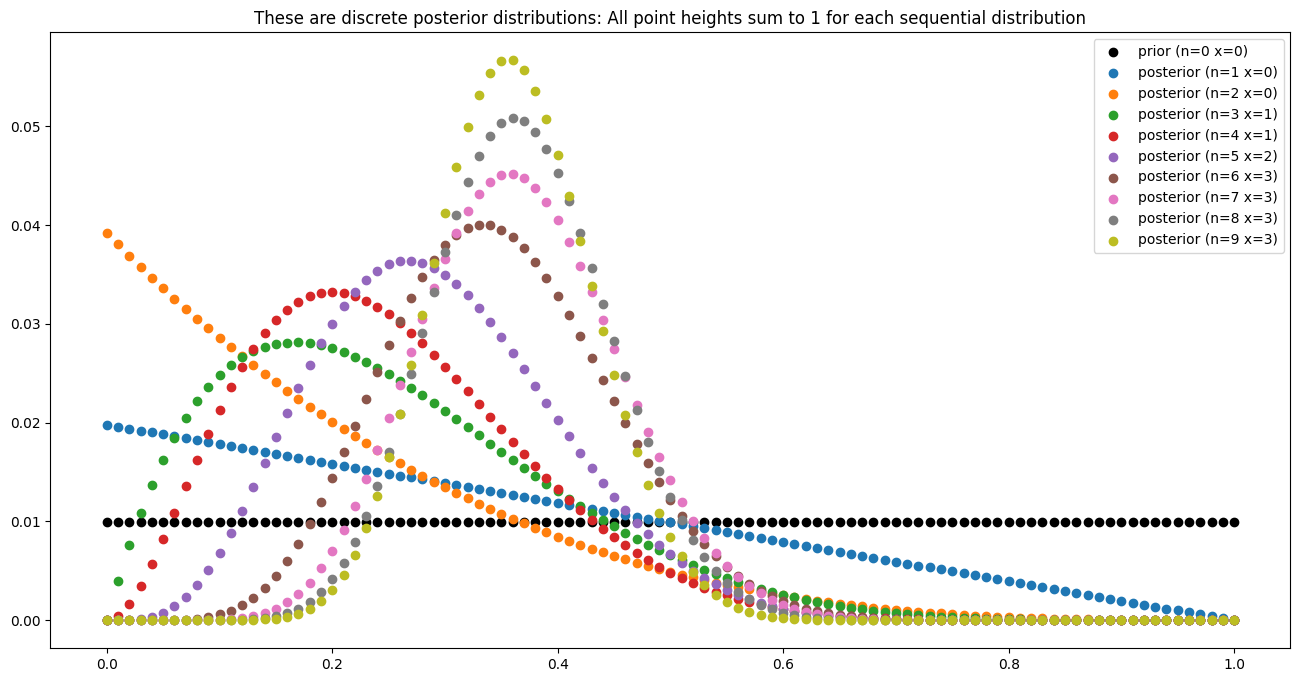

In [2]:
# Q1

import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

parameter_domain = np.linspace(0,1,101)
prior = np.ones(101)/101

observations = 0,0,1,0,1,1,0,0,0
n,x = 0,0
plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")

for observation in observations:
    n += 1
    x += observation
    # use these for batch updates based on a binomial distribution
    # Compute the posterior
    likelihood = parameter_domain**x * (1 - parameter_domain)**(n - x)
    posterior = likelihood * prior  # Unnormalized posterior
    posterior /= posterior.sum()  # Normalize to ensure it sums to 1

    # or do updates in a truly sequential manner using Bernoulli
    prior = posterior  # for each Bernoulli observation update

    plt.scatter(parameter_domain, posterior, label="posterior (n="+str(n)+" x="+str(x)+")")

plt.legend();

The prior distribution is uniform, representing no initial preference for any parameter value.  As we observe more data, the posterior distribution becomes increasingly concentrated around the true value of the parameter. This demonstrates the power of Bayesian learning to refine beliefs as new evidence is incorporated.

## Bayesian/Sequential Learning

A prior is updated to a posterior which becomes the new prior for the next data

\begin{array}{llll}
1.&&\!\!\!\!\!\!&\!\!\!\!\!\!p(\theta | x_1) \propto {} f(x_1|\theta)p(\theta) \\
2.&&\!\!\!\!\!\! p(\theta | x_1, x_2) \propto f(x_2|\theta)&\!\!\!\!\!\!p(\theta | x_1) \\
3.&p(\theta | x_1, x_2, x_3) \propto{} f(x_3|\theta) & \!\!\!\!\!\! p(\theta | x_1, x_2)  \\
\vdots\\
\end{array}

### But this is the same as a single batch update

$$p(\theta | x_1, x_2, x_3) \propto f(x_1,x_2,x_3|\theta)p(\theta)
\overset{(x_i \perp\!\!\perp x_j | \theta)}{=} \underbrace{f(x_1|\theta)f(x_2|\theta)f(x_3|\theta)p(\theta)}_{\left[ \prod_{i=1}^{3}f(x_i|\theta)\right]p(\theta)} $$

## Conditional Independence

\begin{align*}
\text{Conditional Independence} && p(x_2|\theta) &={} p(x_2|x_1,\theta) \; \text{ or } \; (x_2 \perp\!\!\!\perp x_1 | \theta)
\end{align*}

\begin{align*}
p(\theta|x_2,x_1) &\propto{} p(x_2, x_1, \theta)\\
& = {} \underbrace{p(x_2| \theta, x_1)} p(x_1 | \theta) p(\theta)
\color{gray}{\longleftarrow \text{chain rule}}\\
& \quad (x_2 \perp\!\!\!\perp x_1 | \theta)\\
& = {} \overbrace{\;\;p(x_2| \theta)\;\;} \underbrace{p(x_1 | \theta) p(\theta)}_{\propto \; p(\theta|x_1)}\\
&\propto{}  p(x_2| \theta) \underbrace{p(\theta | x_1)}_{\text{new prior}} \longleftarrow \text{previous posterior}
\end{align*}

A prior is updated to a posterior which becomes the new prior for the next data

# **Question 2**

This problem involves implementing a two-entity Bayesian multi-armed bandit algorithm. The process updates Beta posteriors independently for each entity, decides which arm to pull based on posterior probabilities, and simulates and learns the true success probabilities.

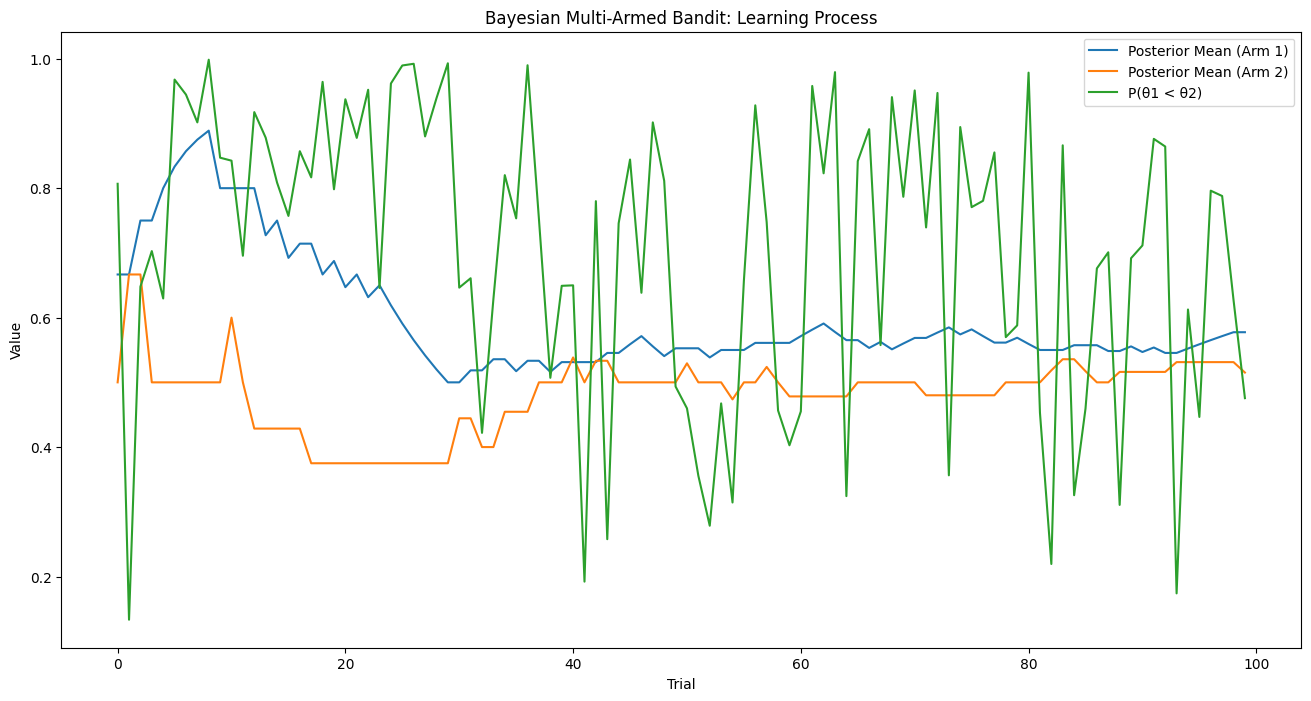

In [1]:
# Q2: Bayesian Multi-Armed Bandit (Two Entities)

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# True probabilities for two arms
theta_true = [0.6, 0.4]

# Initialization
alpha = [1, 1]
beta_param = [1, 1]
n_trials = 100
n_arms = len(theta_true)

# Tracking results
posterior_means = np.zeros((n_trials, n_arms))
prob_theta1_less_theta2 = np.zeros(n_trials)

# Simulation
for t in range(n_trials):
    # Sample from posteriors
    sampled_theta = [np.random.beta(alpha[i], beta_param[i]) for i in range(n_arms)]

    # Calculate P(θ1 < θ2)
    prob_theta1_less_theta2[t] = beta.cdf(sampled_theta[0], alpha[1], beta_param[1])

    # Select arm to pull (exploration-exploitation)
    chosen_arm = np.argmax(sampled_theta)

    # Simulate outcome
    outcome = np.random.rand() < theta_true[chosen_arm]

    # Update Beta parameters
    alpha[chosen_arm] += outcome
    beta_param[chosen_arm] += 1 - outcome

    # Record posterior means
    posterior_means[t] = [alpha[i] / (alpha[i] + beta_param[i]) for i in range(n_arms)]

# Plotting results
plt.figure(figsize=(16, 8))
plt.plot(range(n_trials), posterior_means[:, 0], label="Posterior Mean (Arm 1)")
plt.plot(range(n_trials), posterior_means[:, 1], label="Posterior Mean (Arm 2)")
plt.plot(range(n_trials), prob_theta1_less_theta2, label="P(θ1 < θ2)")
plt.xlabel("Trial")
plt.ylabel("Value")
plt.title("Bayesian Multi-Armed Bandit: Learning Process")
plt.legend()
plt.show()


The algorithm iteratively updates the belief about the success probabilities of each arm (`theta_1` and `theta_2`), adjusting its strategy to favor the more successful arm based on posterior evidence. This is a classic example of the exploration-exploitation tradeoff in action.


# **Question 3**
We will extend the previous models to handle three entities, updating their posteriors sequentially. We will use a Beta-Binomial model for individual updates and then compare it with the Dirichlet-Multinomial model to account for dependencies between the entities.

**Beta-Binomial Model (Three Entities)**

The Beta-Binomial model assumes a Beta distribution for the prior, which is updated with observed data. Each observation for each entity (out of three) is modeled sequentially.

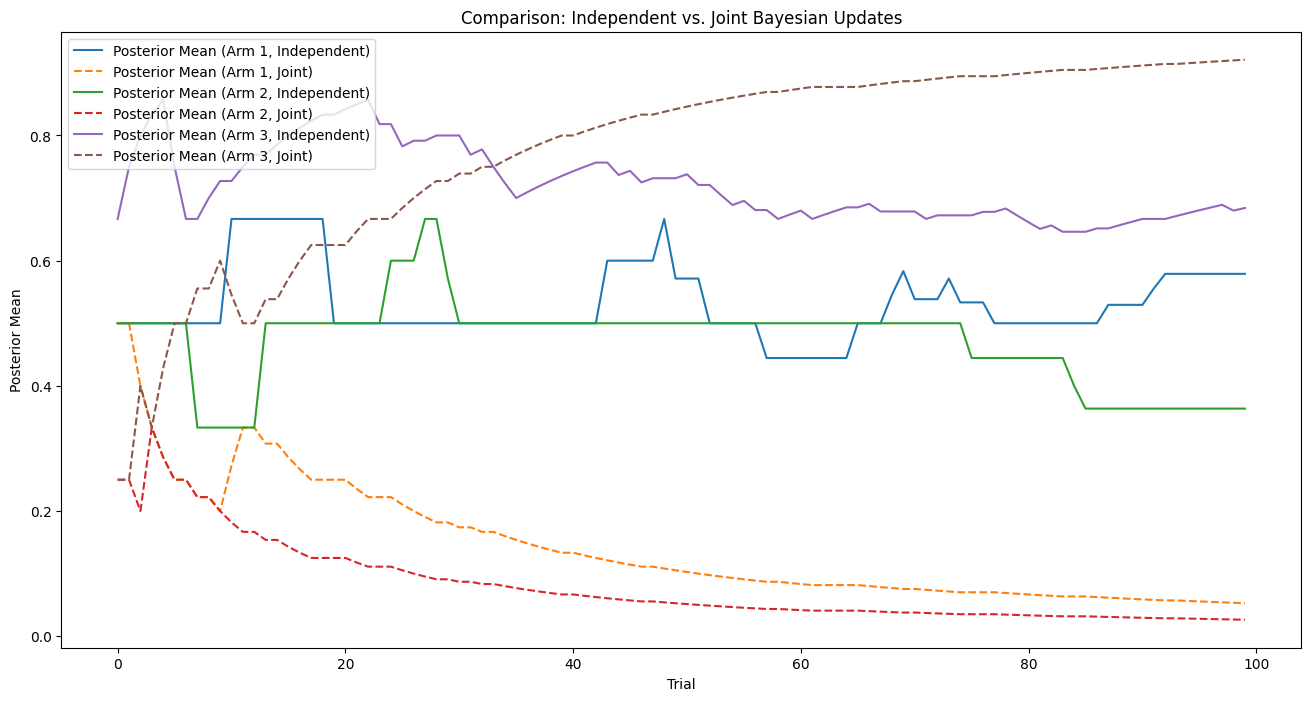

In [8]:
# Q3: Generalization to Three Entities

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, dirichlet

# True probabilities for three arms
theta_true = [0.5, 0.3, 0.7]

# Independent Beta-Binomial analysis
alpha_indep = [1, 1, 1]
beta_indep = [1, 1, 1]

# Joint Dirichlet-Multinomial analysis
alpha_joint = np.ones(3)

n_trials = 100
n_arms = len(theta_true)
posterior_means_indep = np.zeros((n_trials, n_arms))
posterior_means_joint = np.zeros((n_trials, n_arms))

# Simulation
for t in range(n_trials):
    # Sample from independent posteriors
    sampled_indep = [np.random.beta(alpha_indep[i], beta_indep[i]) for i in range(n_arms)]
    sampled_joint = dirichlet.rvs(alpha_joint, size=1).flatten()

    # Choose arm
    chosen_arm_indep = np.argmax(sampled_indep)
    chosen_arm_joint = np.argmax(sampled_joint)

    # Simulate outcomes
    outcome_indep = np.random.rand() < theta_true[chosen_arm_indep]
    outcome_joint = np.random.rand() < theta_true[chosen_arm_joint]

    # Update Beta parameters
    alpha_indep[chosen_arm_indep] += outcome_indep
    beta_indep[chosen_arm_indep] += 1 - outcome_indep

    # Update Dirichlet parameters
    alpha_joint[chosen_arm_joint] += 1 if outcome_joint else 0

    # Record posterior means
    posterior_means_indep[t] = [alpha_indep[i] / (alpha_indep[i] + beta_indep[i]) for i in range(n_arms)]
    posterior_means_joint[t] = alpha_joint / np.sum(alpha_joint)

# Plotting results
plt.figure(figsize=(16, 8))
for i in range(n_arms):
    plt.plot(range(n_trials), posterior_means_indep[:, i], label=f"Posterior Mean (Arm {i+1}, Independent)")
    plt.plot(range(n_trials), posterior_means_joint[:, i], linestyle='--', label=f"Posterior Mean (Arm {i+1}, Joint)")
plt.xlabel("Trial")
plt.ylabel("Posterior Mean")
plt.title("Comparison: Independent vs. Joint Bayesian Updates")
plt.legend()
plt.show()


Comparison of Beta-Binomial and Dirichlet-Multinomial Models

Beta-Binomial Model:

- Treats each entity independently.
- Suitable when the entities are assumed to be independent and there is no correlation between them.
- Simpler to compute and visualize, but less flexible when modeling dependencies.

Dirichlet-Multinomial Model:

- Accounts for correlations between the entities.
- Suitable for situations where the success probabilities of different entities might influence each other.
- More complex to compute, but provides a richer model of dependencies.

Real World Example:

When running an A/B test with three ad designs, each targeting a different demographic (age group). The goal is to determine which ad design is most effective. The click/no-click outcome for each ad is binary, and you are interested in balancing exploration (testing new ad designs) and exploitation (showing the best-performing ad more frequently).

Analysis 1 (Beta-Binomial) is simpler and useful when the entities (ads) are independent, with minimal correlation between their success probabilities.
Analysis 2 (Dirichlet-Multinomial) is more powerful when the entities are related, as it shares information between them, leading to more efficient exploration-exploitation balance.

In a real-world A/B testing context, such as online advertising with multiple ad variants, the Dirichlet-Multinomial model would  be more effective, particularly if the ads are variations of the same product, as it allows for better sharing of performance information between the different ad variants.
